In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox, norm, ks_2samp
from scipy.stats import shapiro, ks_2samp
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import aux_functions_ml as f

In [8]:
df_high_demand_A = pd.read_csv('../Datasets/all_predictions_high_demand_A.csv', index_col=0)
df_products = pd.read_csv('../Datasets/clean_products.csv', index_col=0)
df_orders = pd.read_csv('../Datasets/clean_orders.csv', index_col = 0)
df_order_details = pd.read_csv('../Datasets/clean_order_details.csv', index_col=0)
df_inventory = pd.read_csv('../Datasets/clean_inventory.csv', index_col=0)
df_purchase = pd.read_csv('../Datasets/clean_purchase_orders.csv', index_col=0)


## For productID: 427

In [9]:
df_427 = df_products[df_products['ProductID'] == 427]
df_427

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
399,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61


In [10]:
df_427 = df_427.merge(df_order_details, on = 'ProductID')
df_427

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType,OrderDetailID,OrderID,QuantitySold,UnitSalesPrice,total_price
0,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,17,4,50,4.1,205.0
1,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,49,5,50,4.1,205.0
2,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,78,7,20,4.1,82.0
3,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,108,8,25,4.1,102.5
4,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,170,13,50,4.1,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,111321,2405,1,7.3,7.3
469,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,111446,2408,1,7.0,7.0
470,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,112624,2430,27,6.0,162.0
471,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,113860,2454,2,7.0,14.0


In [11]:
#ganancia media
df_427['UnitSalesPrice'].mean() - df_427['PurchasePrice'].unique()[0]

np.float64(1.365327695560254)

In [12]:
df_427['QuantitySold'].sum(), df_427['total_price'].sum()

(np.int64(7517), np.float64(34526.2))

In [13]:
#ganancia total

ganancia = df_427['total_price'].sum() - df_427['PurchasePrice'].unique()[0] * df_427['QuantitySold'].sum()
ganancia

np.float64(7464.999999999996)

In [14]:
(ganancia / df_427['total_price'].sum()) * 100 #porcentaje de ganancia 

np.float64(21.621261534718553)

In [15]:
df, lead_time = f.select_products_lead_time(df_products, 427)
df, lead_time

(    ProductID ProductName ModelDescription Category        Gender ProductLine  \
 0         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 1         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 2         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 3         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 4         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 5         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 6         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 7         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 8         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 9         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 10        427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 11        427  

In [16]:
lead_time_avg, lead_time_std = f.metricas_lead_time(lead_time)
lead_time_avg, lead_time_std

(np.float64(1.6585365853658536), np.float64(7.414882858473089))

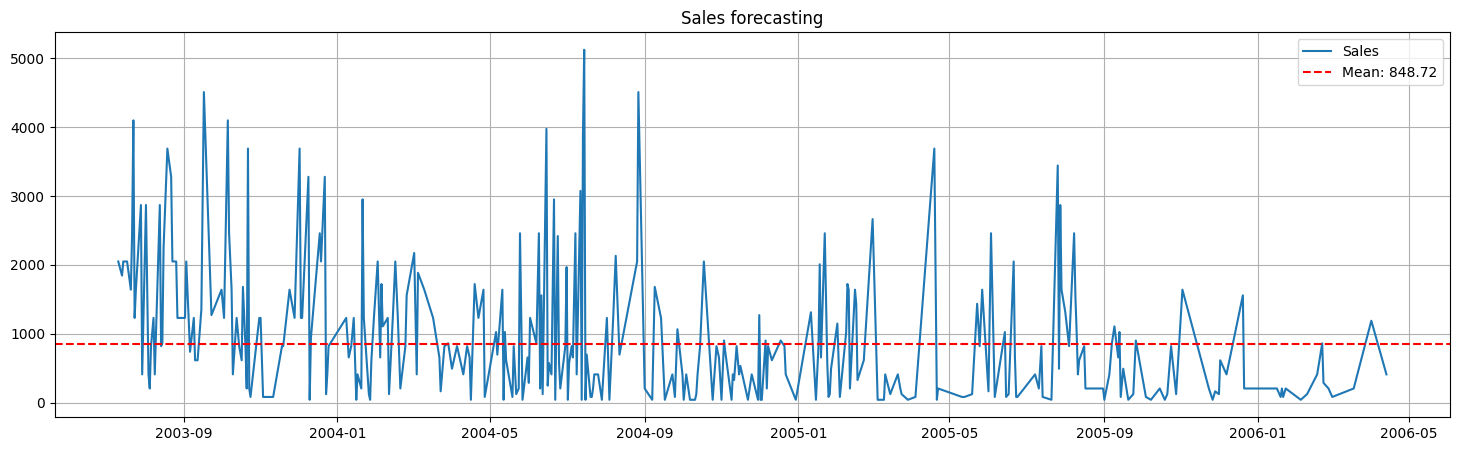

In [17]:
sales = f.demanda(df)

Percentage outliers:  3.7698412698412698


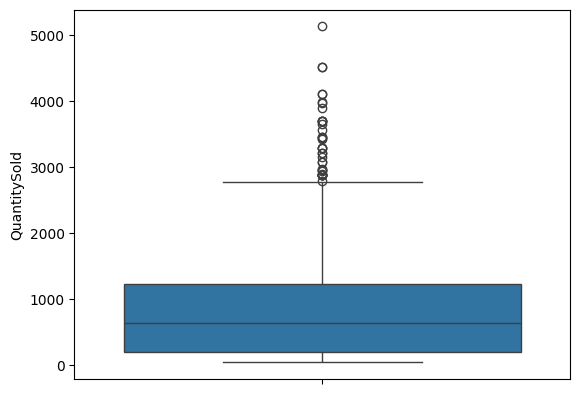

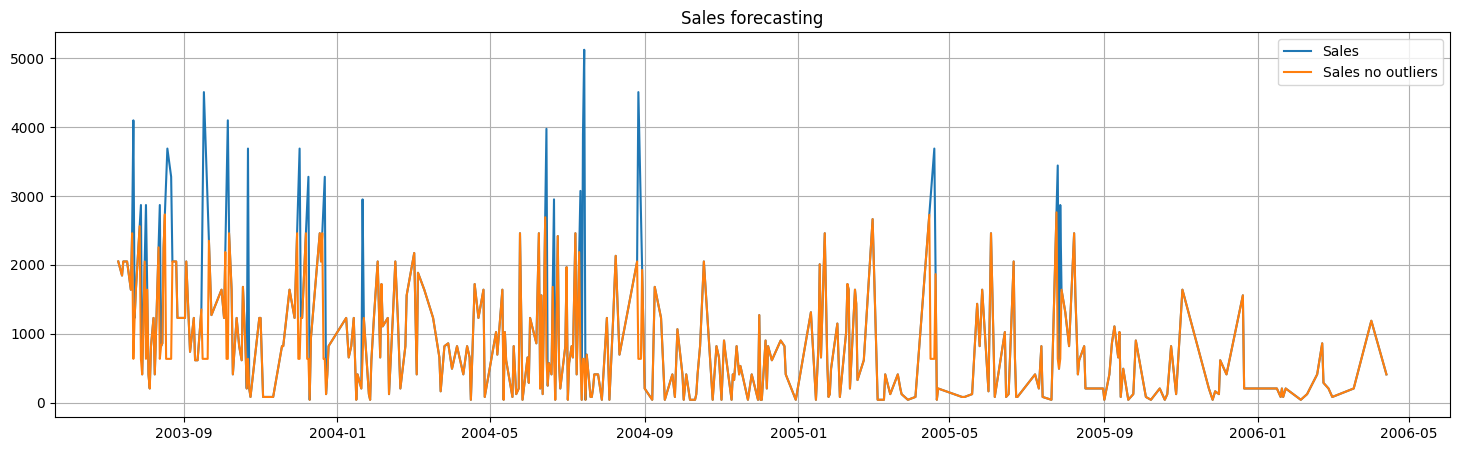

,QuantitySold
OrderDate,
2003-07-11,2050.000000
2003-07-12,1981.666667
2003-07-13,1913.333333
2003-07-14,1845.000000
2003-07-15,2050.000000
...,...
2006-04-09,669.666667
2006-04-10,604.750000
2006-04-11,539.833333


In [18]:
sales = f.estudio_outliers(sales)
sales

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 5.973458967758513e-25


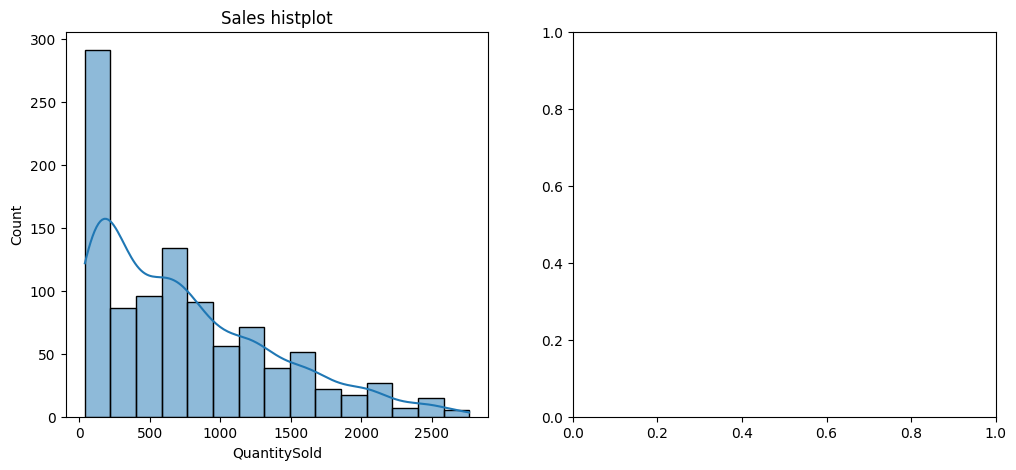

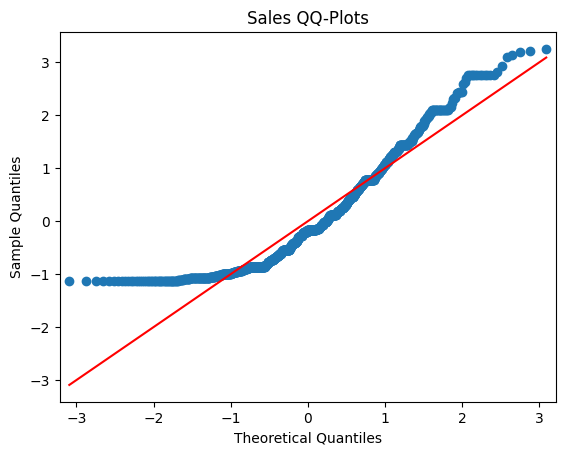

It isn't normal. Applying Box-Cox...
Lambda de Box-Cox: 0.2767904898389381


In [19]:
sales = f.normality_study(sales)

🔹 Reordered dates: [Timestamp('2003-07-12 00:00:00'), Timestamp('2003-07-13 00:00:00'), Timestamp('2003-07-14 00:00:00'), Timestamp('2003-07-15 00:00:00'), Timestamp('2003-07-16 00:00:00'), Timestamp('2003-07-17 00:00:00'), Timestamp('2003-07-18 00:00:00'), Timestamp('2003-07-19 00:00:00'), Timestamp('2003-07-20 00:00:00'), Timestamp('2003-07-21 00:00:00'), Timestamp('2003-07-22 00:00:00'), Timestamp('2003-07-23 00:00:00'), Timestamp('2003-07-24 00:00:00'), Timestamp('2003-07-25 00:00:00'), Timestamp('2003-07-26 00:00:00'), Timestamp('2003-07-27 00:00:00'), Timestamp('2003-07-28 00:00:00'), Timestamp('2003-07-29 00:00:00'), Timestamp('2003-07-30 00:00:00'), Timestamp('2003-07-31 00:00:00'), Timestamp('2003-08-01 00:00:00'), Timestamp('2003-08-02 00:00:00'), Timestamp('2003-08-03 00:00:00'), Timestamp('2003-08-04 00:00:00'), Timestamp('2003-08-05 00:00:00'), Timestamp('2003-08-06 00:00:00'), Timestamp('2003-08-07 00:00:00'), Timestamp('2003-08-08 00:00:00'), Timestamp('2003-08-09 00:00:

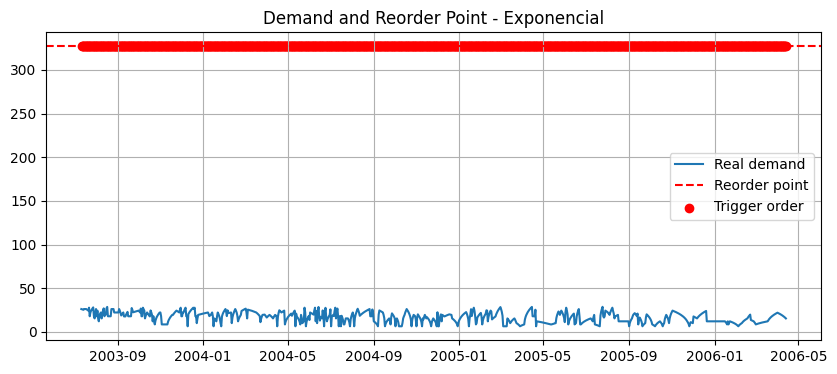

In [20]:
rop_por_producto, security_stocks, fechas_reposicion = f.security_stock(sales, lead_time_avg, lead_time_std)

In [21]:
rop_por_producto

np.float64(327.021453058304)

In [22]:
security_stocks

np.float64(298.7230903164435)

In [23]:
fechas_reposicion

DatetimeIndex(['2003-07-12', '2003-07-13', '2003-07-14', '2003-07-15',
               '2003-07-16', '2003-07-17', '2003-07-18', '2003-07-19',
               '2003-07-20', '2003-07-21',
               ...
               '2006-04-04', '2006-04-05', '2006-04-06', '2006-04-07',
               '2006-04-08', '2006-04-09', '2006-04-10', '2006-04-11',
               '2006-04-12', '2006-04-13'],
              dtype='datetime64[ns]', name='OrderDate', length=1007, freq='D')

### For ProductID = 861

In [24]:
df_861 = df_products[df_products['ProductID'] == 861]
df_861

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
813,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673


In [25]:
df_861 = df_861.merge(df_order_details, on = 'ProductID')
df_861

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType,OrderDetailID,OrderID,QuantitySold,UnitSalesPrice,total_price
0,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,1308,71,60,5.6,336.0
1,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,3776,190,8,5.6,44.8
2,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,3786,191,30,5.6,168.0
3,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,3818,192,2,5.6,11.2
4,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,5445,258,1,5.6,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,113511,2443,1,9.0,9.0
354,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,113644,2451,1,7.5,7.5
355,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,113805,2454,2,9.0,18.0
356,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,113950,2455,2,9.0,18.0


In [26]:
#ganancia media
df_861['UnitSalesPrice'].mean() - df_861['PurchasePrice'].unique()[0]

np.float64(2.137150837988826)

In [27]:
df_861['QuantitySold'].sum(), df_861['total_price'].sum()

(np.int64(3236), np.float64(22009.8))

In [28]:
ganancia = df_861['total_price'].sum() - df_861['PurchasePrice'].unique()[0] * df_861['QuantitySold'].sum()
ganancia

np.float64(6153.399999999998)

In [29]:
(ganancia / df_861['total_price'].sum()) * 100 #porcentaje de ganancia 

np.float64(27.957546183972585)

In [30]:
df, lead_time = f.select_products_lead_time(df_products, 861)
df, lead_time

(    ProductID ProductName ModelDescription Category           Gender  \
 0         861    XL-K4673                K   Briefs  Women's Panties   
 1         861    XL-K4673                K   Briefs  Women's Panties   
 2         861    XL-K4673                K   Briefs  Women's Panties   
 3         861    XL-K4673                K   Briefs  Women's Panties   
 4         861    XL-K4673                K   Briefs  Women's Panties   
 5         861    XL-K4673                K   Briefs  Women's Panties   
 6         861    XL-K4673                K   Briefs  Women's Panties   
 7         861    XL-K4673                K   Briefs  Women's Panties   
 8         861    XL-K4673                K   Briefs  Women's Panties   
 9         861    XL-K4673                K   Briefs  Women's Panties   
 10        861    XL-K4673                K   Briefs  Women's Panties   
 11        861    XL-K4673                K   Briefs  Women's Panties   
 12        861    XL-K4673                K   Brief

In [31]:
lead_time

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     9.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
dtype: float64

In [32]:
lead_time_avg, lead_time_std = f.metricas_lead_time(lead_time)
lead_time_avg, lead_time_std

(np.float64(0.23684210526315788), np.float64(1.4599927901768635))

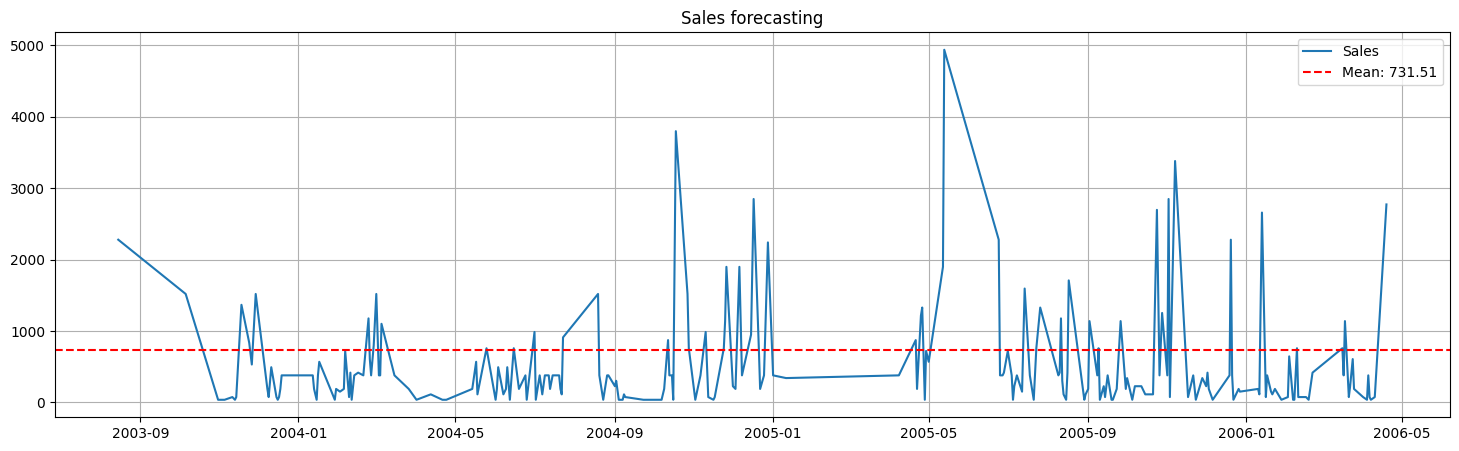

In [33]:
sales = f.demanda(df)

Percentage outliers:  8.375893769152196


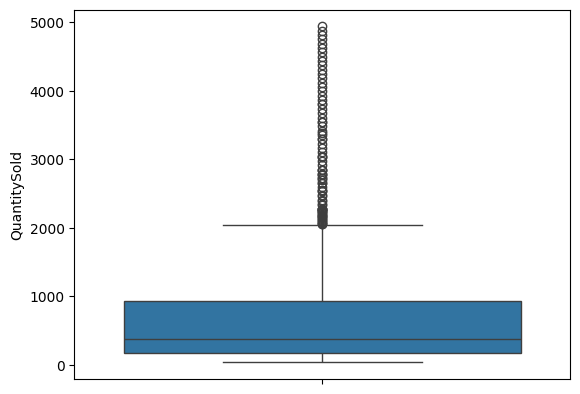

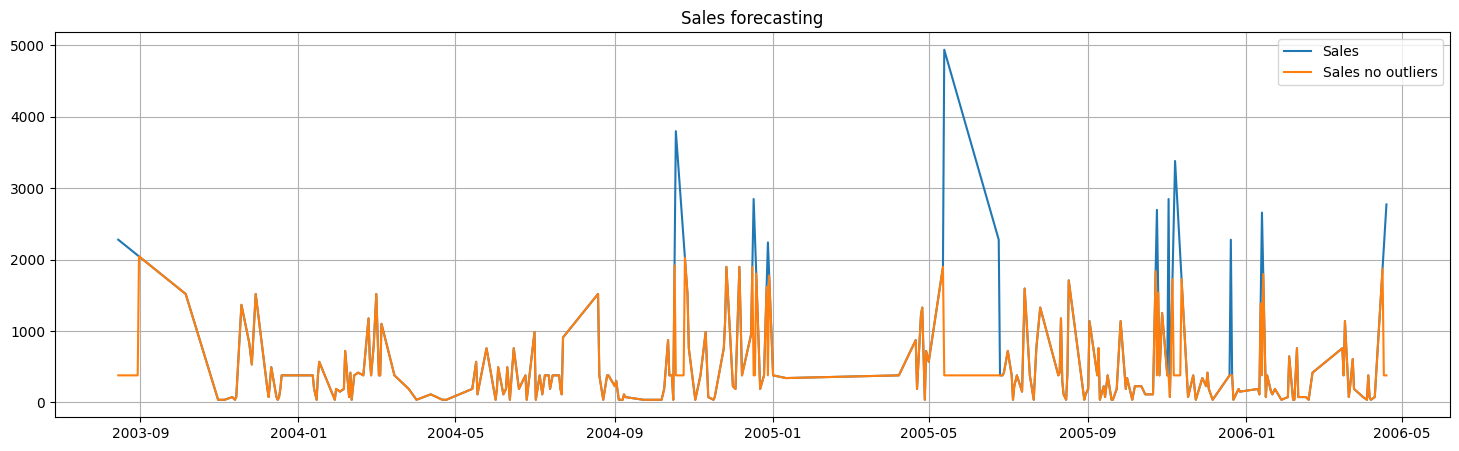

,QuantitySold
OrderDate,
2003-08-15,380.000000
2003-08-16,380.000000
2003-08-17,380.000000
2003-08-18,380.000000
2003-08-19,380.000000
...,...
2006-04-15,1574.888889
2006-04-16,1874.666667
2006-04-17,380.000000


In [34]:
sales = f.estudio_outliers(sales)
sales

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 6.187202509908718e-32


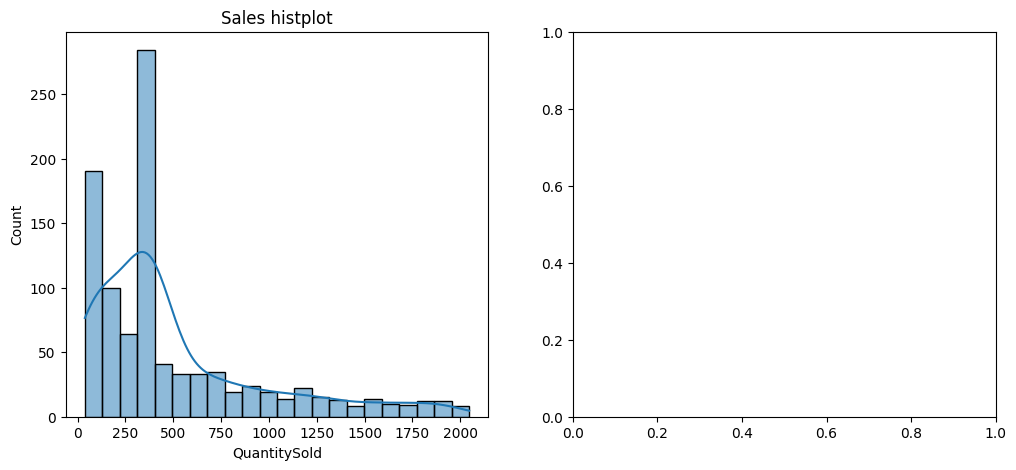

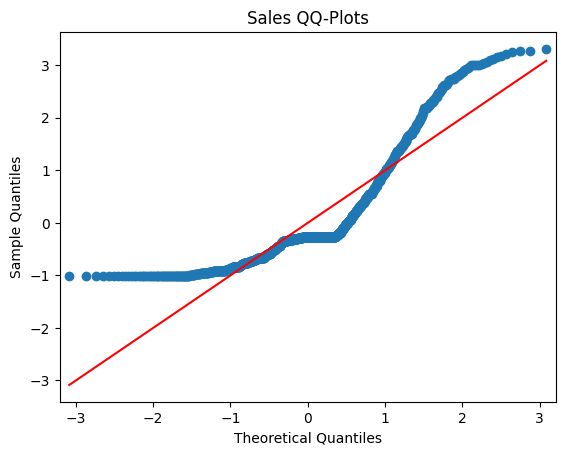

It isn't normal. Applying Box-Cox...
Lambda de Box-Cox: 0.17524297062169425


In [35]:
sales = f.normality_study(sales)

🔹 Reordered dates: [Timestamp('2003-08-15 00:00:00'), Timestamp('2003-08-16 00:00:00'), Timestamp('2003-08-17 00:00:00'), Timestamp('2003-08-18 00:00:00'), Timestamp('2003-08-19 00:00:00'), Timestamp('2003-08-20 00:00:00'), Timestamp('2003-08-21 00:00:00'), Timestamp('2003-08-22 00:00:00'), Timestamp('2003-08-23 00:00:00'), Timestamp('2003-08-24 00:00:00'), Timestamp('2003-08-25 00:00:00'), Timestamp('2003-08-26 00:00:00'), Timestamp('2003-08-27 00:00:00'), Timestamp('2003-08-28 00:00:00'), Timestamp('2003-08-29 00:00:00'), Timestamp('2003-08-30 00:00:00'), Timestamp('2003-08-31 00:00:00'), Timestamp('2003-09-01 00:00:00'), Timestamp('2003-09-02 00:00:00'), Timestamp('2003-09-03 00:00:00'), Timestamp('2003-09-04 00:00:00'), Timestamp('2003-09-05 00:00:00'), Timestamp('2003-09-06 00:00:00'), Timestamp('2003-09-07 00:00:00'), Timestamp('2003-09-08 00:00:00'), Timestamp('2003-09-09 00:00:00'), Timestamp('2003-09-10 00:00:00'), Timestamp('2003-09-11 00:00:00'), Timestamp('2003-09-12 00:00:

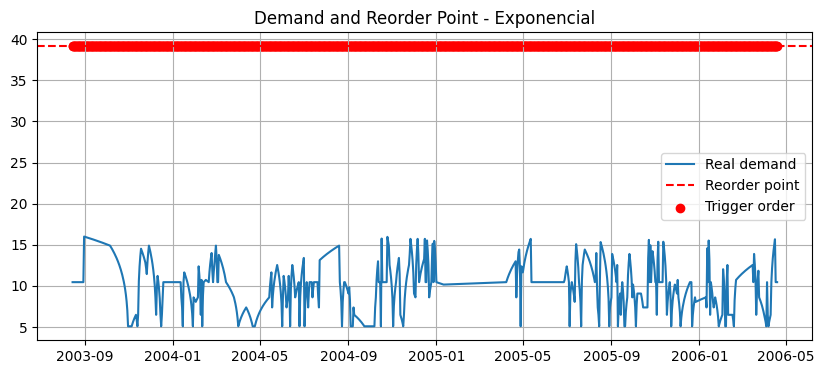

In [36]:
rop_por_producto, security_stocks, fechas_reposicion = f.security_stock(sales, lead_time_avg, lead_time_std)

In [37]:
sales

,QuantitySold
OrderDate,
2003-08-15,10.453897
2003-08-16,10.453897
2003-08-17,10.453897
2003-08-18,10.453897
2003-08-19,10.453897
...,...
2006-04-15,15.026294
2006-04-16,15.669139
2006-04-17,10.453897


### For ProductID = 865

In [69]:
df_865 = df_products[df_products['ProductID'] == 865]
df_865

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
817,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S


In [70]:
df_865 = df_865.merge(df_order_details, on = 'ProductID')
df_865

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType,OrderDetailID,OrderID,QuantitySold,UnitSalesPrice,total_price
0,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,145,10,40,5.4,216.0
1,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,239,20,10,5.4,54.0
2,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,762,41,10,5.4,54.0
3,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,962,54,10,5.4,54.0
4,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,1254,69,20,5.4,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,113543,2446,12,8.4,100.8
314,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,113595,2448,5,8.4,42.0
315,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,113986,2456,2,7.8,15.6
316,865,XL-K46S,K,Briefs,Women's Panties,Underwear,620,XL,Dozen,In Production,2003-07-10,4.7,K46S,114174,2463,5,8.4,42.0


In [71]:
df_865['QuantitySold'].sum(), df_865['total_price'].sum()

(np.int64(2427), np.float64(15148.400000000001))

In [72]:
ganancia = df_865['total_price'].sum() - df_865['PurchasePrice'].unique()[0] * df_865['QuantitySold'].sum()
ganancia

np.float64(3741.500000000002)

In [73]:
(ganancia / df_865['total_price'].sum()) * 100 #porcentaje de ganancia 

np.float64(24.698978109899407)

In [74]:
df, lead_time = f.select_products_lead_time(df_products, 865)
df, lead_time

(    ProductID ProductName ModelDescription Category           Gender  \
 0         865     XL-K46S                K   Briefs  Women's Panties   
 1         865     XL-K46S                K   Briefs  Women's Panties   
 2         865     XL-K46S                K   Briefs  Women's Panties   
 3         865     XL-K46S                K   Briefs  Women's Panties   
 4         865     XL-K46S                K   Briefs  Women's Panties   
 5         865     XL-K46S                K   Briefs  Women's Panties   
 6         865     XL-K46S                K   Briefs  Women's Panties   
 7         865     XL-K46S                K   Briefs  Women's Panties   
 8         865     XL-K46S                K   Briefs  Women's Panties   
 9         865     XL-K46S                K   Briefs  Women's Panties   
 10        865     XL-K46S                K   Briefs  Women's Panties   
 11        865     XL-K46S                K   Briefs  Women's Panties   
 12        865     XL-K46S                K   Brief

In [68]:
lead_time_avg, lead_time_std = f.metricas_lead_time(lead_time)
lead_time_avg, lead_time_std

(np.float64(0.2903225806451613), np.float64(1.6164477182409738))

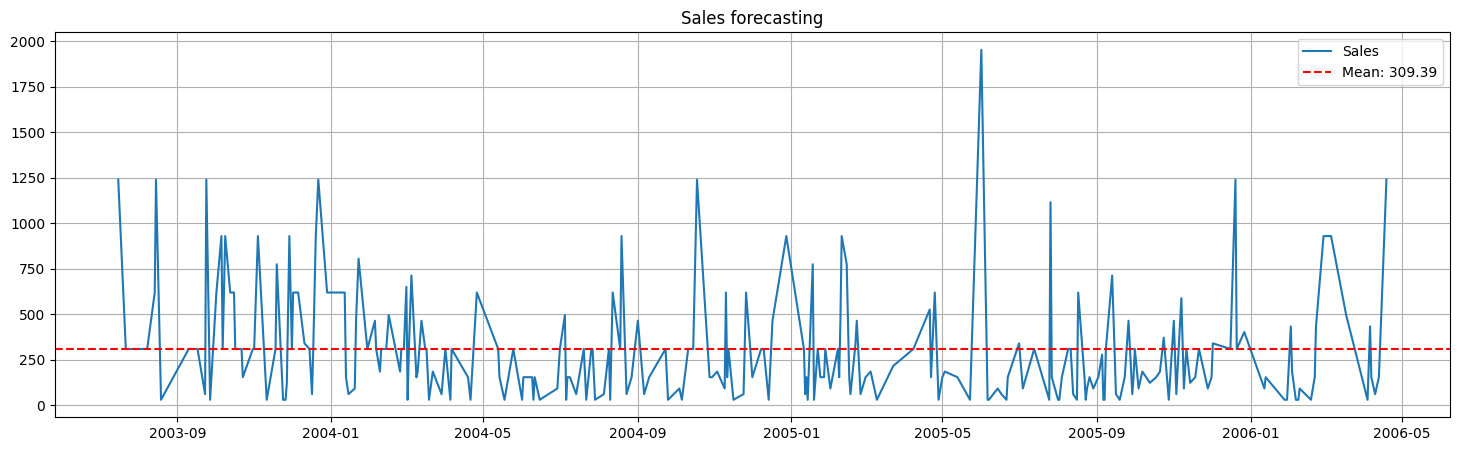

In [75]:
sales = f.demanda(df)

Percentage outliers:  6.342913776015857


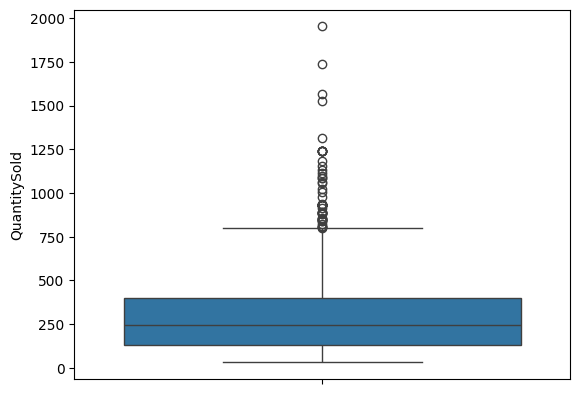

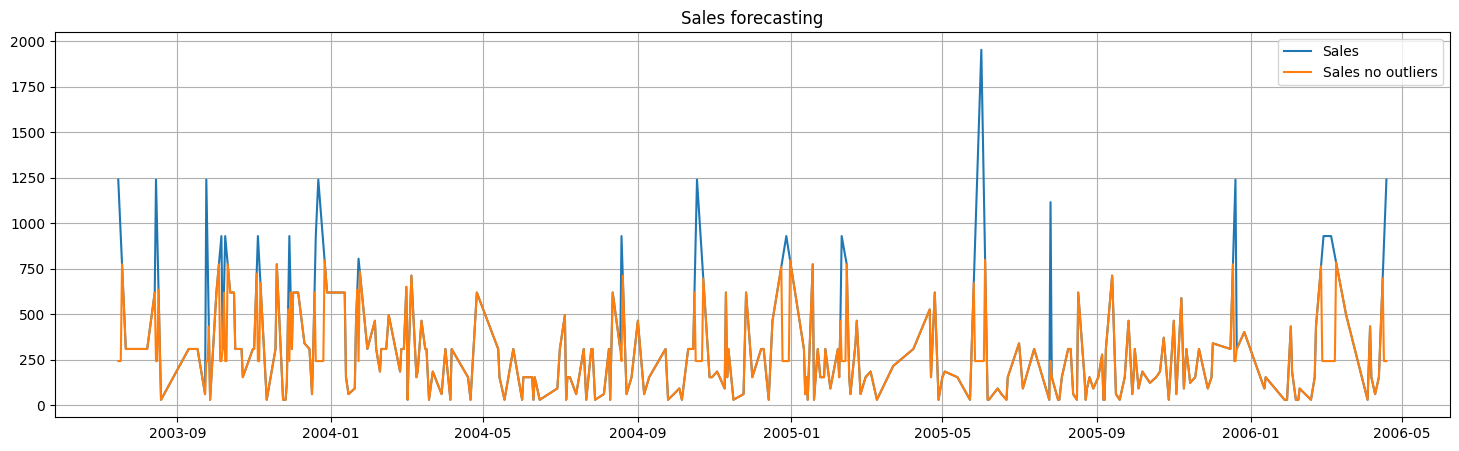

,QuantitySold
OrderDate,
2003-07-16,243.571429
2003-07-17,243.571429
2003-07-18,243.571429
2003-07-19,775.000000
2003-07-20,620.000000
...,...
2006-04-15,516.666667
2006-04-16,697.500000
2006-04-17,243.571429


In [76]:
sales = f.estudio_outliers(sales)
sales

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 3.379827705070564e-23


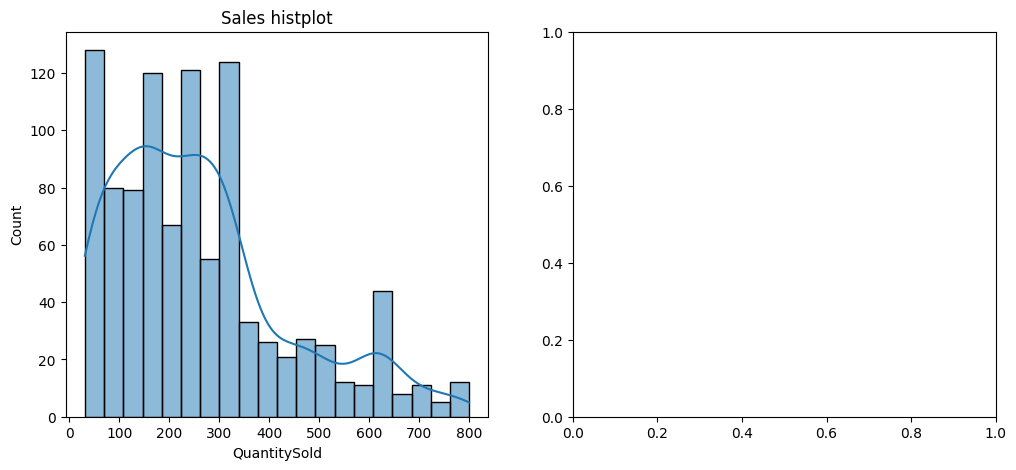

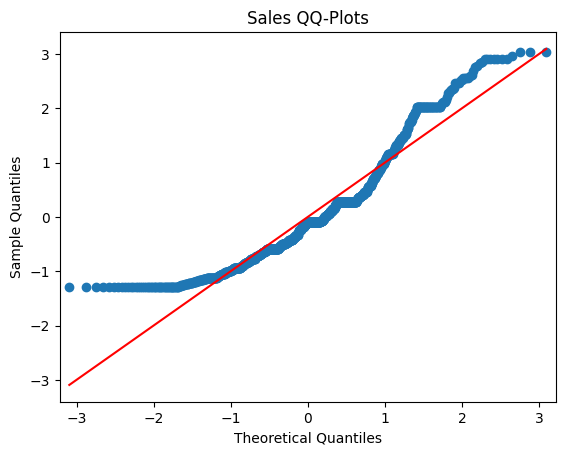

It isn't normal. Applying Box-Cox...
Lambda de Box-Cox: 0.3188500654895398


In [77]:
sales = f.normality_study(sales)

🔹 Reordered dates: [Timestamp('2003-07-16 00:00:00'), Timestamp('2003-07-17 00:00:00'), Timestamp('2003-07-18 00:00:00'), Timestamp('2003-07-19 00:00:00'), Timestamp('2003-07-20 00:00:00'), Timestamp('2003-07-21 00:00:00'), Timestamp('2003-07-22 00:00:00'), Timestamp('2003-07-23 00:00:00'), Timestamp('2003-07-24 00:00:00'), Timestamp('2003-07-25 00:00:00'), Timestamp('2003-07-26 00:00:00'), Timestamp('2003-07-27 00:00:00'), Timestamp('2003-07-28 00:00:00'), Timestamp('2003-07-29 00:00:00'), Timestamp('2003-07-30 00:00:00'), Timestamp('2003-07-31 00:00:00'), Timestamp('2003-08-01 00:00:00'), Timestamp('2003-08-02 00:00:00'), Timestamp('2003-08-03 00:00:00'), Timestamp('2003-08-04 00:00:00'), Timestamp('2003-08-05 00:00:00'), Timestamp('2003-08-06 00:00:00'), Timestamp('2003-08-07 00:00:00'), Timestamp('2003-08-08 00:00:00'), Timestamp('2003-08-09 00:00:00'), Timestamp('2003-08-10 00:00:00'), Timestamp('2003-08-11 00:00:00'), Timestamp('2003-08-12 00:00:00'), Timestamp('2003-08-13 00:00:

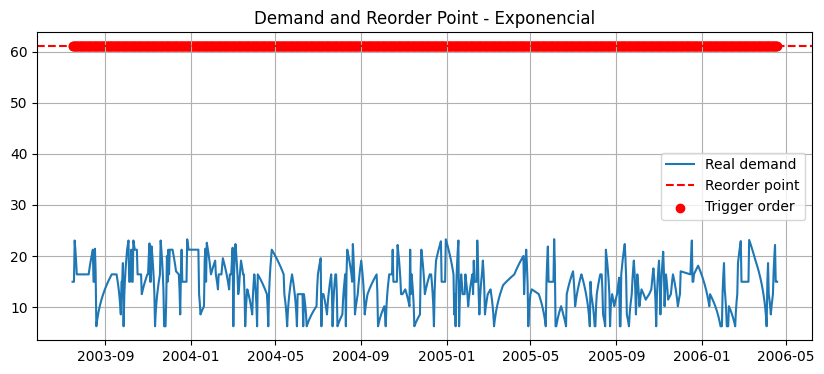

In [78]:
rop_por_producto, security_stocks, fechas_reposicion = f.security_stock(sales, lead_time_avg, lead_time_std)

### product id = ..

In [81]:
df_830 = df_products[df_products['ProductID'] == 830]
df_830

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
782,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29


In [82]:
df_830 = df_830.merge(df_order_details, on = 'ProductID')
df_830

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType,OrderDetailID,OrderID,QuantitySold,UnitSalesPrice,total_price
0,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,758,41,20,3.8,76.0
1,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,1096,61,3,5.0,15.0
2,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,1527,81,20,3.8,76.0
3,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,1711,93,25,3.8,95.0
4,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,1725,94,1,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,110973,2400,2,5.6,11.2
302,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,111161,2402,10,6.7,67.0
303,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,112981,2438,1,5.9,5.9
304,830,XL-K29,K,Briefs,Women's Panties,Underwear,475,XL,Dozen,In Production,2003-07-10,3.5,K29,113225,2442,1,7.0,7.0


In [83]:
df_830['QuantitySold'].sum(), df_830['total_price'].sum()

(np.int64(3113), np.float64(14906.0))

In [84]:
#ganancia total

ganancia = df_830['total_price'].sum() - df_830['PurchasePrice'].unique()[0] * df_830['QuantitySold'].sum()
ganancia

np.float64(4010.5)

In [85]:
(ganancia / df_830['total_price'].sum()) * 100 #porcentaje de ganancia 

np.float64(26.905273044411647)

In [79]:
df, lead_time = f.select_products_lead_time(df_products, 830)
df, lead_time

(    ProductID ProductName ModelDescription Category           Gender  \
 0         830      XL-K29                K   Briefs  Women's Panties   
 1         830      XL-K29                K   Briefs  Women's Panties   
 2         830      XL-K29                K   Briefs  Women's Panties   
 3         830      XL-K29                K   Briefs  Women's Panties   
 4         830      XL-K29                K   Briefs  Women's Panties   
 5         830      XL-K29                K   Briefs  Women's Panties   
 6         830      XL-K29                K   Briefs  Women's Panties   
 7         830      XL-K29                K   Briefs  Women's Panties   
 8         830      XL-K29                K   Briefs  Women's Panties   
 9         830      XL-K29                K   Briefs  Women's Panties   
 10        830      XL-K29                K   Briefs  Women's Panties   
 11        830      XL-K29                K   Briefs  Women's Panties   
 12        830      XL-K29                K   Brief

In [80]:
lead_time_avg, lead_time_std = f.metricas_lead_time(lead_time)
lead_time_avg, lead_time_std

(np.float64(0.32142857142857145), np.float64(1.7008401285415229))

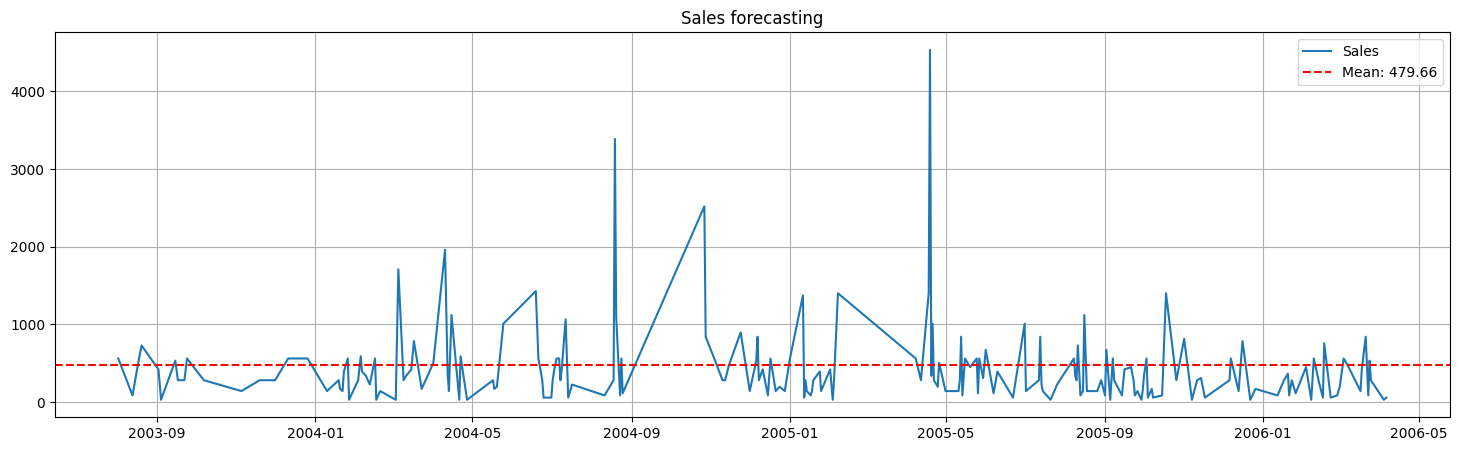

In [86]:
sales = f.demanda(df)

Percentage outliers:  8.478038815117467


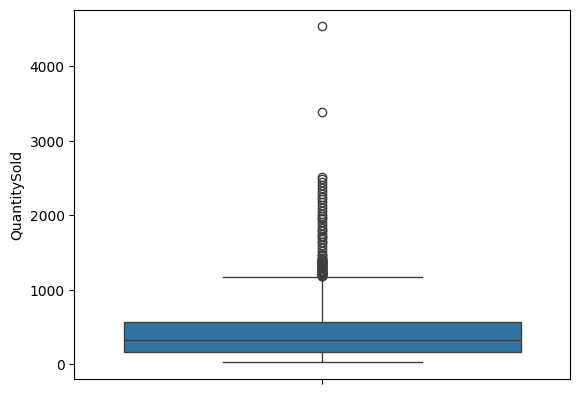

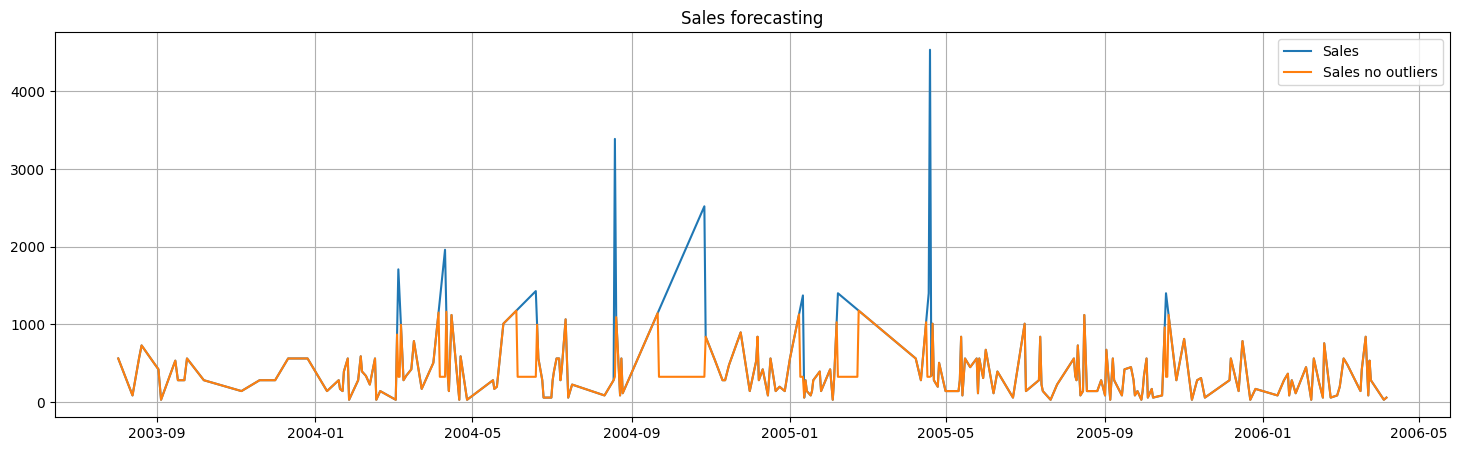

,QuantitySold
OrderDate,
2003-08-02,560.000000
2003-08-03,516.727273
2003-08-04,473.454545
2003-08-05,430.181818
2003-08-06,386.909091
...,...
2006-04-02,78.400000
2006-04-03,53.200000
2006-04-04,28.000000


In [87]:
sales = f.estudio_outliers(sales)
sales

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 1.4409533125867655e-25


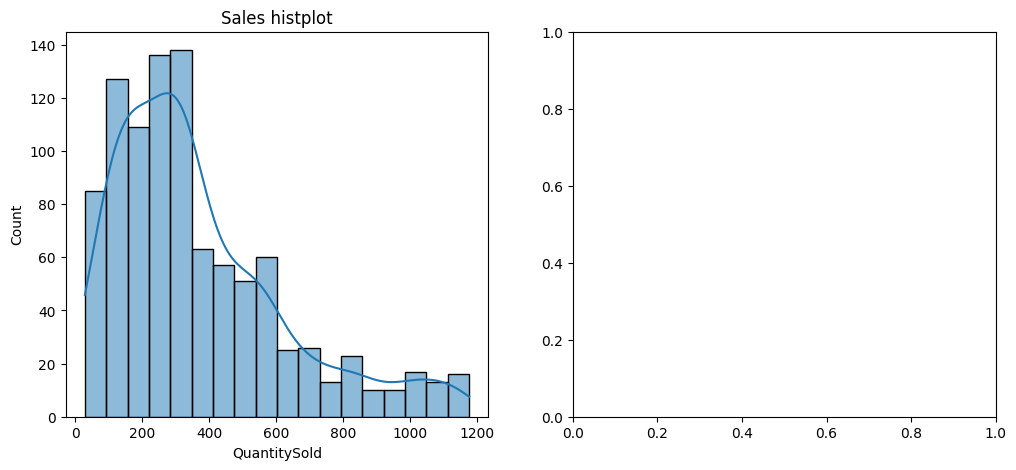

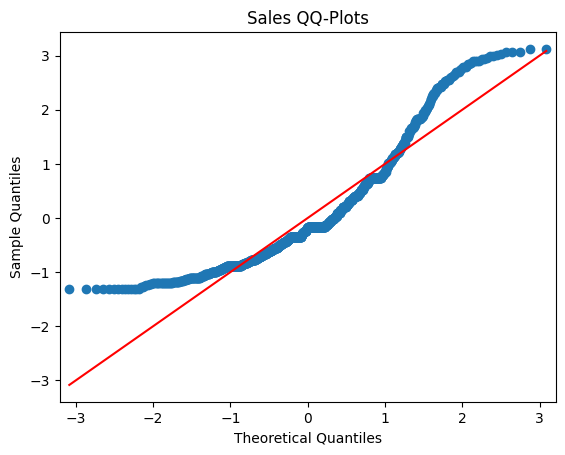

It isn't normal. Applying Box-Cox...
Lambda de Box-Cox: 0.2416568767063297


In [88]:
sales = f.normality_study(sales)

🔹 Reordered dates: [Timestamp('2003-08-02 00:00:00'), Timestamp('2003-08-03 00:00:00'), Timestamp('2003-08-04 00:00:00'), Timestamp('2003-08-05 00:00:00'), Timestamp('2003-08-06 00:00:00'), Timestamp('2003-08-07 00:00:00'), Timestamp('2003-08-08 00:00:00'), Timestamp('2003-08-09 00:00:00'), Timestamp('2003-08-10 00:00:00'), Timestamp('2003-08-11 00:00:00'), Timestamp('2003-08-12 00:00:00'), Timestamp('2003-08-13 00:00:00'), Timestamp('2003-08-14 00:00:00'), Timestamp('2003-08-15 00:00:00'), Timestamp('2003-08-16 00:00:00'), Timestamp('2003-08-17 00:00:00'), Timestamp('2003-08-18 00:00:00'), Timestamp('2003-08-19 00:00:00'), Timestamp('2003-08-20 00:00:00'), Timestamp('2003-08-21 00:00:00'), Timestamp('2003-08-22 00:00:00'), Timestamp('2003-08-23 00:00:00'), Timestamp('2003-08-24 00:00:00'), Timestamp('2003-08-25 00:00:00'), Timestamp('2003-08-26 00:00:00'), Timestamp('2003-08-27 00:00:00'), Timestamp('2003-08-28 00:00:00'), Timestamp('2003-08-29 00:00:00'), Timestamp('2003-08-30 00:00:

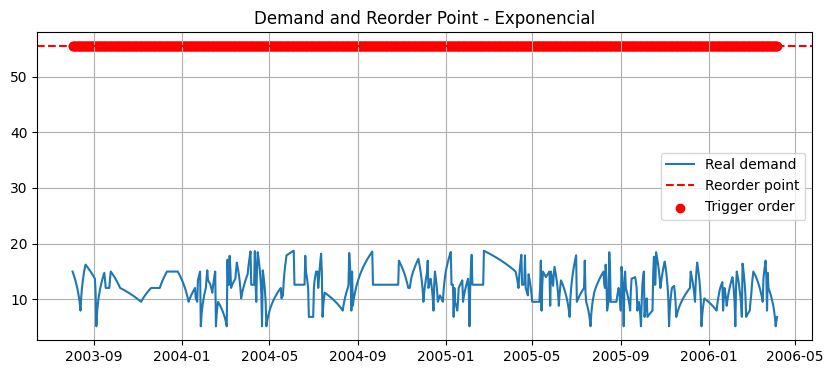

In [89]:
rop_por_producto, security_stocks, fechas_reposicion = f.security_stock(sales, lead_time_avg, lead_time_std)

| ProductID | Product Name | Category  | Lead time (avg) | Lead time (std) | ROP | Security Stock | Percentage profit |
|-----------|-----------|-----------|-----------|-------------|---------|-------------|--------------|
|  427 | *M-ERK61* | Briefs | 1.65 | 7.41 | 327.02 | 298.72 | 21.62% |
|  861  | *XL-K4673* | Briefs | 0.23 | 1.45 | 39.14 | 36.71 | 27.95% |
|  865  | *XL-K465* | Briefs | 0.29 | 1.69 | 61.05 | 56.88 | 24.69% |
|  830  | *XL-K29* | Briefs | 0.32 | 1.70 | 55.47 | 51.50 | 26.905% | 

In [91]:
data = {
    'ProductID': [427, 861, 865, 830],
    'LeadTime(avg)': [1.65, 0.23, 0.29, 0.32], 
    'LeadTime(std)': [7.41, 1.45, 1.69, 1.70], 
    'ROP': [327.02, 39.14, 61.05, 55.47],
    'SecurityStock':[298.72, 36.71, 56.88, 51.50]
}

In [96]:
df_rop = pd.DataFrame(data)
df_rop

,ProductID,LeadTime(avg),LeadTime(std),ROP,SecurityStock
0,427,1.65,7.41,327.02,298.72
1,861,0.23,1.45,39.14,36.71
2,865,0.29,1.69,61.05,56.88
3,830,0.32,1.70,55.47,51.50


In [95]:
df_warehouse = pd.read_csv('../Datasets/final_distribution_warehouse.csv', index_col = 0)
df_warehouse

,ProductID,X,Y,Stock,ProductName,Category,Gender,ProductLine,Weight,Size,PackSize,ProductType
0,6,0,0,296.0,3-BX34,Boxers,Boys' Briefs,Underwear,55,M,Single Unit,BX34
1,7,0,1,2.0,3-BX64,Boxers,Boys' Briefs,Underwear,55,M,Single Unit,BX64
2,1034,0,2,313.0,L-BX46A,Boxers,Men's Briefs,Underwear,80,L,Single Unit,BX46A
3,3614,0,3,20.0,2-BX46SL,Boxers,Boys' Briefs,Underwear,55,S,Single Unit,BX46SL
4,3615,0,4,8.0,3-BX46SL,Boxers,Boys' Briefs,Underwear,65,M,Single Unit,BX46SL
...,...,...,...,...,...,...,...,...,...,...,...,...
4024,4404,69,22,130.0,XL-ERK46S,Briefs,Men's Briefs,Underwear,685,XL,Dozen,ERK46S
4025,4405,69,23,130.0,M-ERK46C,Briefs,Men's Briefs,Underwear,575,M,Dozen,ERK46C
4026,4406,69,24,120.0,L-ERK46C,Briefs,Men's Briefs,Underwear,645,L,Dozen,ERK46C
4027,4407,69,25,130.0,XL-ERK46C,Briefs,Men's Briefs,Underwear,690,XL,Dozen,ERK46C


In [97]:
df_rop = df_rop.merge(df_warehouse, on = 'ProductID')
df_rop

,ProductID,LeadTime(avg),LeadTime(std),ROP,SecurityStock,X,Y,Stock,ProductName,Category,Gender,ProductLine,Weight,Size,PackSize,ProductType
0,427,1.65,7.41,327.02,298.72,26,32,6303.0,M-ERK61,Briefs,Men's Briefs,Underwear,505,M,Dozen,ERK61
1,861,0.23,1.45,39.14,36.71,31,33,3236.0,XL-K4673,Briefs,Women's Panties,Underwear,557,XL,Dozen,K4673
2,865,0.29,1.69,61.05,56.88,31,37,2182.0,XL-K46S,Briefs,Women's Panties,Underwear,620,XL,Dozen,K46S
3,830,0.32,1.70,55.47,51.50,31,2,2967.0,XL-K29,Briefs,Women's Panties,Underwear,475,XL,Dozen,K29


In [98]:
df_rop.to_csv('../Datasets/product_security_stock.csv')